# Exploratory Data Analysis : United Kingdom European Union membership referendum in 2016

![title](kemi.png)
Source(https://www.kemi.se/lagar-och-regler/brexit)

## Content

1. Introduction: <br>
1.1 Introduction <br> 
1.2 Objectives  <br>
1.3 Findings <br>

2. Data<br>
2.1 Data Preparation(UK Government Data)<br>
2.2 Data Preparation(British Election Study)<br>

3. Data Visulisation and Analysis<br>
3.1 Referendum Results and Turnout in UK<br>
3.2 Referendum Results across Regions and Areas<br>
3.3 Referendum Results and Age<br>
3.4 Referendum Results and Political Party<br>
3.5 Text Analysis: Word Cloud

### 1.1  Introduction:

The referendum was held on the 23 June 2016 to decide whether the United Kingdom should remain a member of the European Union or leave, and UK votes to leave the EU as a result. Even though the outcome had been expected to be tight, in the days running up to the referendum bookmakers and pollsters predicted the Remain side to win. Many observers were left puzzled and keen to understand who voted for Leave. 

The project conducts exploratory data analysis to measure and study the result of 2016 United Kingdom European Union membership referendum with datasets collected from <b><i>UK Government Data </i></b> and the <b><i>British Election Study </i></b>.

### 1.2  Objectives:
The project takes a comprehensive approach to understand the Brexit vote and is going to achieve the following objectives by means of data analysis and visualization:Provide an overview of the result of EU referendum across regions and areas;Study the relationship between vote preference and attributes of voters(e.g. age and party identification);Understand the key correlates, such as important issues and people's main concern on Brexit</li></ol>


### 1.3  Findings:
In the analysis process, it can be concluded that:<br>
1. In terms of areas in UK, northern part of UK(e.g.Scotland and North Ireland) and London have higher rates of Vote Remain; and the remaining tend to vote "Leave". 
2. Even though each age groups share similar population on voting "stay", the large porpotion of the old (over 50) in UK are Brexit adcovators(due to differnt population base among each age groups).<br>
3. More than 95% supporters of UKIP have vote preference on "leave the EU". On the other hand, more than 80% Green party supporters vote "stay", yet because of its small party size, they overall take account of less than 6% in total Vote Stay.<br>
4. The text analysis highlights the higher Vote Leave share in referendum results are very likely linked to public pressure from immigration.

## 2. Data 
Load libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json
import altair as alt #declarative data visualisation library
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import seaborn as sns
import matplotlib_venn 

### 2.1 Data Preparation (UK Government Data)
##### The data from UK Government Data is resotred to provide an overview of the result of EU referendum across regions and areas.

First, I obtain the EU referendum result data released by <b><i>UK Government Data </i></b>(data.gov.uk), in which each each observation in the dataset is compromised of 21 variables.<br> Among these 21 variables, I drop 6 variables here(<i>Region_Code, Area_Code, No_official_mark, Voting_for_both_answers, Writing_or_mark</i> and <i>Unmarked_or_void</i>). Because for <i>Region_Code</i> and <i>Area_Code</i> are respectively corresponding to other two variables,<i>region</i> and <i>area</i>. And the remaining four variables are components of the variable,<i>Rejected_Ballots</i>, which is not the main concern in this project.	


In [2]:
pdfile = pd.read_csv('EU-referendum-result-data.csv')
#Drop unneeded columns
pdfile = pdfile.drop(columns=['Region_Code'])
pdfile = pdfile.drop(columns=['ExpectedBallots'])
pdfile = pdfile.drop(columns=['Area_Code'])
pdfile = pdfile.drop(columns=['No_official_mark'])
pdfile = pdfile.drop(columns=['Writing_or_mark'])
pdfile = pdfile.drop(columns=['Unmarked_or_void'])

In [3]:
print("A breif description of", pdfile.shape[1], "columns for", pdfile.shape[0],"areas in UK is provided below:")

A breif description of 15 columns for 382 areas in UK is provided below:


<b>id: </b> unique number id of an area<br>
<b>Region: </b> region name(There are 8 regions in UK)<br> 
<b>Area: </b> area name(There are 382 areas in UK)<br> 
<b>Electorate: </b> number of all people who are entitled to vote <br>
<b>VerifiedBallotPapers: </b> number of verified ballots <br>
<b>Pct_Turnout: </b> percentage of turnout <br>
<b>Votes_Cast: </b> number of votes cast<br>
<b>Valid_Votes: </b> number of valid votes<br>
<b>Remain: </b> number of votes for remain  <br>
<b>Leave: </b> number of votes for leave  <br>
<b>Rejected_Ballots: </b> number of ballots being rejected<br>
<b>Voting_for_both_answers: </b> number of people voting for both remain and leave<br>
<b>Pct_Remain: </b> percentage of votes for remain<br>
<b>Pct_Leave: </b> percentage of votes for leave<br>
<b>Pct_Rejected: </b> percentage of ballots being rejected<br>

In [4]:
pdfile.head()

,id,Region,Area,Electorate,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,Voting_for_both_answers,Pct_Remain,Pct_Leave,Pct_Rejected
0,108,East,Peterborough,120892,87469,72.35,87469,87392,34176,53216,77,32,39.11,60.89,0.09
1,109,East,Luton,127612,84636,66.31,84616,84481,36708,47773,135,85,43.45,56.55,0.16
2,112,East,Southend-on-Sea,128856,93939,72.90,93939,93870,39348,54522,69,21,41.92,58.08,0.07
3,113,East,Thurrock,109897,79954,72.75,79950,79916,22151,57765,34,8,27.72,72.28,0.04
4,110,East,Bedford,119530,86136,72.06,86135,86066,41497,44569,69,26,48.22,51.78,0.08


### 2.2 Data Preparation (British Election Study)
###### The data from British Elecltion Study is used to study the relationship between vote preference and attributes of voters(e.g. age and political party) and text analysis about people's concern on Brexit.

Such data is derived from the face-to-face survey of nearly three thousands eligible voters(address-based random probability sample) living accross in England, Scotland, and Wales with hundreds of questions, conducted by British Election Study between May 8th 2015 and September 13th 2015. Due to the large amount of quesitons, in this project, instaed of calling all columns, the specific colummn will be called when needed.<br>
For example,I extract specific variables from the orignial big dataset<b>(stata_cloud)</b> into two new data files on Stata to demostrates individuals's vote preference and their political party and their age respectively:<br>

* The first dataframe, <b>pp</b> shows individuals vote results and political party they support.<br>
* The second dataframe,<b>age</b> shows respondents vote results, age and age group.<br>
* And the <b>stata_cloud</b> is the original big dataset containing more than hundreds questions, and it is     also where pp and age are extracted from.<br>

The data in <b>pp</b> and <b>age</b> has been cleaned in STATA before importing into python.For example, cleaning all missing values and dropping the rows of individuals without any vote prefenrence and party identification. And for <b>age</b>, I create one more column,age group,and add that into the datframe.

<b>Variables: </b><br>
<b>partyId: </b>party identification of an individual<br>
<b>euRefVote: </b> people's vote preference on EU memebership referendum<br>
<b>age: </b>people's age<br>
<b>age_group: </b> age group that an individual belongs to

In [5]:
pp = pd.read_stata('political party_cleaned.dta')
pp.head()

,partyId,euRefVote
0,Labour,Leave the EU
1,Conservative,Leave the EU
2,Scottish National Party (SNP),Leave the EU
3,Conservative,Leave the EU
4,Conservative,Leave the EU


In [6]:
age =pd.read_stata('age_group_cleaned.dta') 
age['age_group'] = age['age_group'].map({30:"18-30",50:'31-50',70: "51-70",100:"71-96"})
age.head(8)

,age,euRefVote,age_group
0,60,Leave the EU,51-70
1,64,Leave the EU,51-70
2,59,Leave the EU,51-70
3,53,Stay/remain in the EU,51-70
4,52,Leave the EU,51-70
5,70,Leave the EU,51-70
6,39,Leave the EU,31-50
7,44,Stay/remain in the EU,31-50


In [7]:
stata_cloud = pd.read_stata('bes_f2f_2015_v4.0.dta')

## 3.Data Visulization and Anaylsis

![title](vote.png)
Source(https://www.bbc.co.uk/news/politics/eu_referendum/results)<br>

### 3.1  Referendum Results and Turnout in UK
Based on the dataset, I calculate that the total vote of remain is 16141241 and the total vote of leave is 17410742,  <b><i>identical to the results released by BBC</i></b>(see graph above) .That is, approximately 52%, or more than 17 million people, voted to leave the EU. <br>
The second pie chart tells the turnout rate was 72.2%, with more than 33.5 million votes cast.

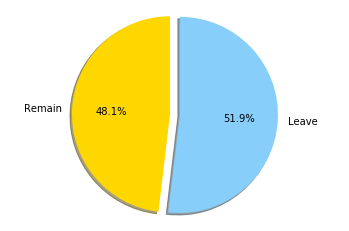

Total vote of Remain: 16141241 (valid vote only) for  48.108158018558846 %
Total vote of Leave: 17410742 (valid vote only) for  51.891841981441154 %


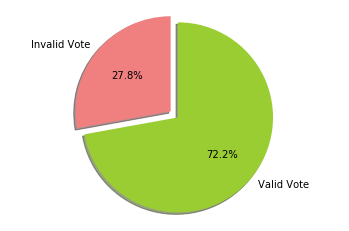

The referendum turnout was 72.1548005988215 %


In [8]:
remain_sum = pdfile['Remain'].sum()
leave_sum = pdfile['Leave'].sum()

labels = 'Remain', 'Leave'
sizes = [remain_sum, leave_sum]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['gold','lightskyblue']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print("Total vote of Remain:", remain_sum,"(valid vote only) for ",(remain_sum*100/(remain_sum+leave_sum)),"%")
print("Total vote of Leave:", leave_sum, "(valid vote only) for ",(leave_sum*100/(remain_sum+leave_sum)),"%")


allv = pdfile['Electorate'].sum()
validv = pdfile['Valid_Votes'].sum()
labels2 = 'Invalid Vote', 'Valid Vote'
sizes2 = [allv-validv, validv]
explode2 = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors2 = ['lightcoral','yellowgreen']

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, explode=explode2, labels=labels2,colors = colors2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print("The referendum turnout was",validv*100/allv,'%')

### 3.2 Referendum Results across Regions and Areas
The first bar chart tells ditribution of vote among 12 regions in the UK. The second line graph tells the percentage of remain among each 12 regions and highlight the average remain rate overall.
Since there are 382 areas in the UK, the third bar chart displays the referendum results of top 25 areas with highest percentage of turnout.

In [9]:
sdata = pdfile[['Region', 'Remain', 'Leave', 'Rejected_Ballots']]

sdata.head(4)

attr_list = []

for i in sdata.index:
    Region, Remain, Leave, Rejected = sdata.loc[i]
    attr_list.append([Region, 'Remain', Remain])
    attr_list.append([Region, 'Leave', Leave])
#     attr_list.append([Region, 'Rejected Ballots', Rejected])
    
sdata = pd.DataFrame(attr_list, columns=['Region', 'Type', 'People'])
#plot
bars = alt.Chart(sdata).mark_bar().encode(
    x=alt.X('sum(People)', stack='zero'),
    y=alt.Y('Region'),
    color=alt.Color('Type')
)

text = alt.Chart(sdata).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('sum(People):Q', stack='zero'),
    y=alt.Y('Region'),
    detail='Type',
    text=alt.Text('sum(People):Q', format='i')
)

(bars + text).properties(width=700, height=300, title= "Referendum Results across Regions")

alt.LayerChart(...)

In [10]:
Region_mean_rate = pdfile.groupby('Region').mean()

Region_mean_rate['Region'] = Region_mean_rate.index

Region_mean_rate = Region_mean_rate[['Region', 'Pct_Remain', 'Pct_Leave']]


#plot percentage of remain across regions
line = alt.Chart(Region_mean_rate).mark_line(
    color='green'
).encode(
    x='Region',
    y='Pct_Remain'
)



mean = alt.Chart(Region_mean_rate).mark_rule(
    color='black'
).encode(
    y='mean(Pct_Remain)'
)
(line+mean).properties(width=600, height=200, title = "Pecentage of Remain across Regions")

alt.LayerChart(...)

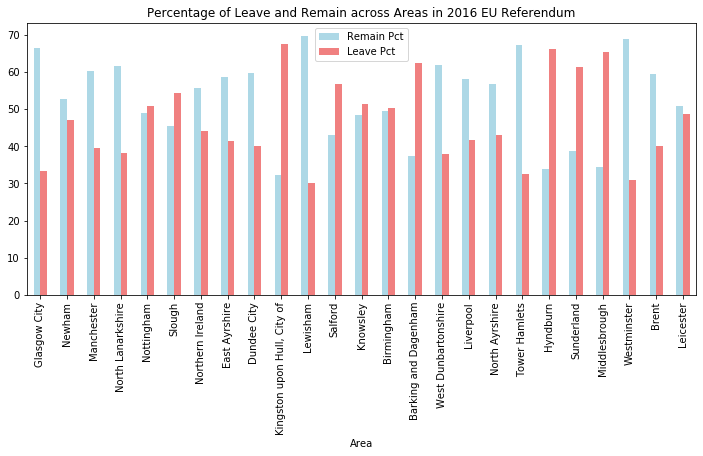

The top 5 highest average percentage of REMAIN among all 382 areas:
Gibraltar, Lambeth, Hackney, Haringey, City of London
The top 5 highest average percentage of LEAVE among all 382 areas:
Boston, South Holland, Castle Point, Thurrock, Great Yarmouth


In [11]:
area = pdfile.groupby("Area")
#area.describe().head()

#the top 5 highest average percentage of REMAIN among all 382 areas:
high_remain = area.mean().sort_values(by = "Pct_Remain",ascending=False).head()
#the top 5 highest average percentage LEAVE among all 382 areas:
high_leave = area.mean().sort_values(by = "Pct_Leave",ascending=False).head()
#plot 25 areas with highest percentage of turnout
def remain_pct(row):
    # returns the percentage of votes
    return float(row['Remain'] * 100) / row['Votes_Cast']

def leave_pct(row):
    # returns the percentage of votes
    return float(row['Leave'] * 100) / row['Votes_Cast']

pdfile['Remain Pct'] = pdfile.apply(remain_pct, axis=1)
pdfile['Leave Pct'] = pdfile.apply(leave_pct, axis=1)

df = pdfile.sort_values(by='Pct_Turnout', ascending=True).head(25)
features = ['Remain Pct','Leave Pct']

df = df.reindex()
df.plot(title = 'Percentage of Leave and Remain across Areas in 2016 EU Referendum',x='Area',y=features, sort_columns=True, kind='bar',figsize=(12,5),color=['lightblue', 'lightcoral'])
plt.show()
print ("The top 5 highest average percentage of REMAIN among all 382 areas:")
print (', '.join(high_remain.index.tolist()))
print ("The top 5 highest average percentage of LEAVE among all 382 areas:")
print (', '.join(high_leave.index.tolist()))

Besides areas with highest remain rates and leave rates mentioned above,if we refer our data results to any resulted map provided by others on the internet(here I choose the one from <b>Encyclopedia Britannica</b>,as shown below, because the regions are clearly stated on the map), our results correctly show the distributions and <b>accord with reality</b>. For instance, the majority of London, Scotland vote "Remain"; yet West Midlands and North East vote "Leave".

![title](uk_map.png)

### 3.3  Referendum Results and Age
The violin plots are used illustrate age distribution of vote results in this project. The white dot in the middle is the median value and the thick black bar in the centre represents the interquartile range. <br>
People vote "Leave the EU" are overall older(median around 60 years old) than people vote"Stay/remain in the EU"(median around 50 years old).<br> Also, the interquartile range of Brexit adcovators are more concenrated in a narrow range(around 48 to 68 years old). While the interquartile range of Brexit opponents are spread in a wider range of age.
Among people vote "Leave", it clearly shows old people over 45 occupy a large porpotion, yet most young people did not vote "Leave". On the other hand, though people of all ages vote "Stay" in general, the population of people aged from 40 to 60 offered fewer vote on "Stay" than other counterparts.<br>
The pivot table below the violin plots provides more information about vote results based on each age groups.

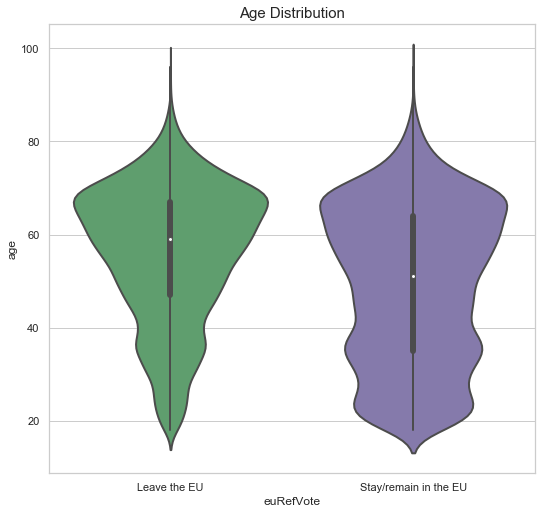

age_group  euRefVote            
18-30      Leave the EU             1061
           Stay/remain in the EU    2721
31-50      Leave the EU             3937
           Stay/remain in the EU    4695
51-70      Leave the EU             8488
           Stay/remain in the EU    6403
71-96      Leave the EU             2307
           Stay/remain in the EU    1396
dtype: int64

In [12]:
sns.set(style="whitegrid", rc={'figure.figsize':(8.7,8.27)})
ax = sns.violinplot(x="euRefVote", y="age", data=age,scale="count",inner="box",linewidth = 2,palette=['g','m'])
plt.title('Age Distribution',fontsize =15)
plt.show()
age_summ = age.pivot_table(index=['age_group','euRefVote'], aggfunc='size')
age_summ

### 3.4  Referendum Results and  Political Party
The vote on Britain's membership of the European Union cut across party lines, with significant division within Britain's main political parties.<br>
The following charts below shows the contribution of vote results by each political parties. <br>
The dataframe below the first stacked bar charts is designed to lay out the contribtions of each political parties on the referendum results, including the numbers and the percentage of vote.<br>
<b>The first bar chart:</b><br>
Within this sample(around three thousands individuals),the first stacked bar chart shows most vote of Leave are from mainly from three parties:Conservatives, Labour and UKIP.Meanwhile, most vote of Stay are from: Labour, Conservatives and Liberal Democrat.However, due to a large number of people within main parties,it has been noticed that Conservatives and Labour occupy large shares in both "Leave" and "Stay" vote. Therefore,layout within each political parties is necessary in order to trace their political stands, as shown in the follwoing.<br>
<b>The pie charts:</b><br>
Conservatives voted to Leave, 65% to 35%. Labour voters (67%) and Liberal Democrats (75%) largely voted for Remain but significant minorities went for Leave. Only UKIP, where 97.5% voted for Leave, and the Greens, where 81.5% voted for Remain, avoided significant internal divisions on the vote. <br>
In genral, a majority of voters for UKIP, the Conservatives and Plaid Cymru advised that they voted to leave the European Union in the Brexit referendum of 2016. The Green Party and the Liberal Democrats had the highest share of people who voted to remain in the EU.

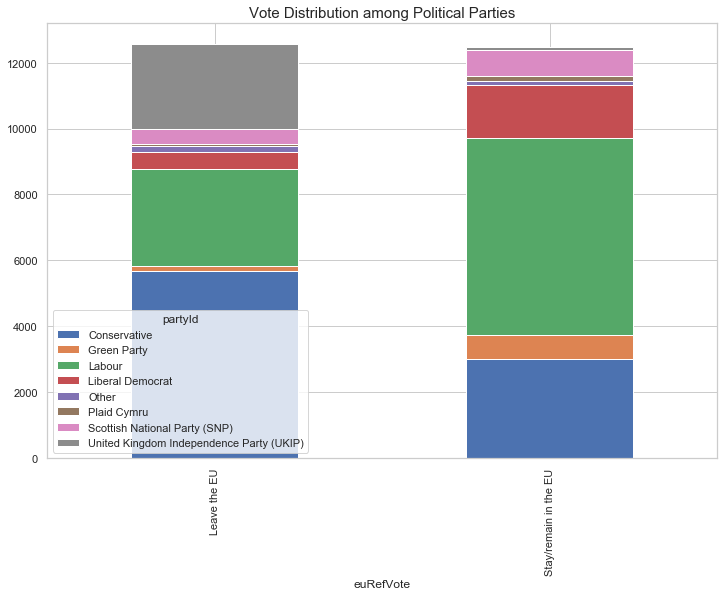

size  \
euRefVote             partyId                                          
Leave the EU          Conservative                              5673   
                      Green Party                                165   
                      Labour                                    2924   
                      Liberal Democrat                           541   
                      Other                                      155   
                      Plaid Cymru                                 63   
                      Scottish National Party (SNP)              461   
                      United Kingdom Independence Party (UKIP)  2583   
Stay/remain in the EU Conservative                              3005   
                      Green Party                                739   
                      Labour                                    5968   
                      Liberal Democrat                          1604   
                      Other                                      133   
                      Plaid Cymru                                140   
                      Scottish National Party (SNP)              808   
                      United Kingdom Independence Party (UKIP)    62   

                                                                percentage  
euRefVote             partyId                                               
Leave the EU          Conservative                                   45.15  
                      Green Party                                     1.31  
                      Labour                                         23.27  
                      Liberal Democrat                                4.31  
                      Other                                           1.23  
                      Plaid Cymru                                     0.50  
                      Scottish National Party (SNP)                   3.67  
                      United Kingdom Independence Party (UKIP)       20.56  
Stay/remain in the EU Conservative                                   24.12  
                      Green Party                                     5.93  
                      Labour                                         47.90  
                      Liberal Democrat                               12.87  
                      Other                                           1.07  
                      Plaid Cymru                                     1.12  
                      Scottish National Party (SNP)                   6.49  
                      United Kingdom Independence Party (UKIP)        0.50

In [13]:
pp.groupby(['euRefVote','partyId']).size().unstack().plot(kind='bar',figsize=(12,8),stacked=True)
plt.title('Vote Distribution among Political Parties', fontsize = 15)
plt.show()
#political party summary table
pp_sum = pp.pivot_table(index=['euRefVote','partyId'], aggfunc=['size'])
pp_sum["percentage"] = pp_sum.groupby(level=0).transform(lambda x: round(x*100/x.sum(),2))
pp_sum

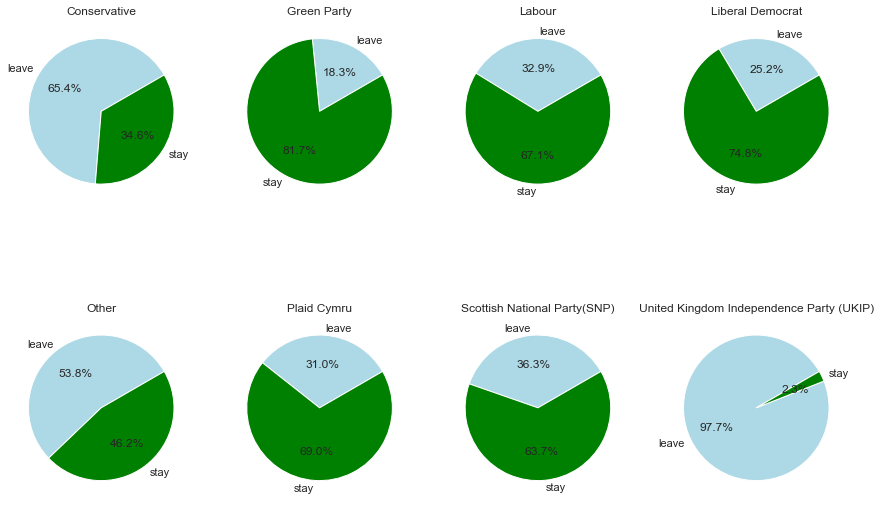

In [14]:
pp_vote =pd.read_excel('pp_vote.xlsx') 
pp_vote

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, (idx, row) in enumerate(pp_vote.set_index('partyId').iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, autopct='%1.1f%%',colors=['lightblue','green'])
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

### 3.5 Text Anlysis: Word Cloud
The word cloud is constructed out of responses to question “what is single most important issue facing country at the time”(refers to column <i>'A1'</i> in the dataset ) from the 2015 British Election study.<br>

Even though I set the maximum number of words to become 200 in the code, in the word cloud, the keyword immigration is still quite striking. What is more, there are things like “many people”, “many foreigns”, “overcrowding” appear in addition to the simple immigration keyword. Meanwhile, other themes, such as “finance”, “security” and concerns about the “national health” seem to feature quite large as well.<br>

In conclusion, according to the survey conducted by BES, the word cloud suggests that voters considered immigration to be the single most important issue of the time when it comes to EU membership referendum.

In [15]:
A1 = stata_cloud[["A1"]].to_string()
#wordcloud = WordCloud().generate(A1)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

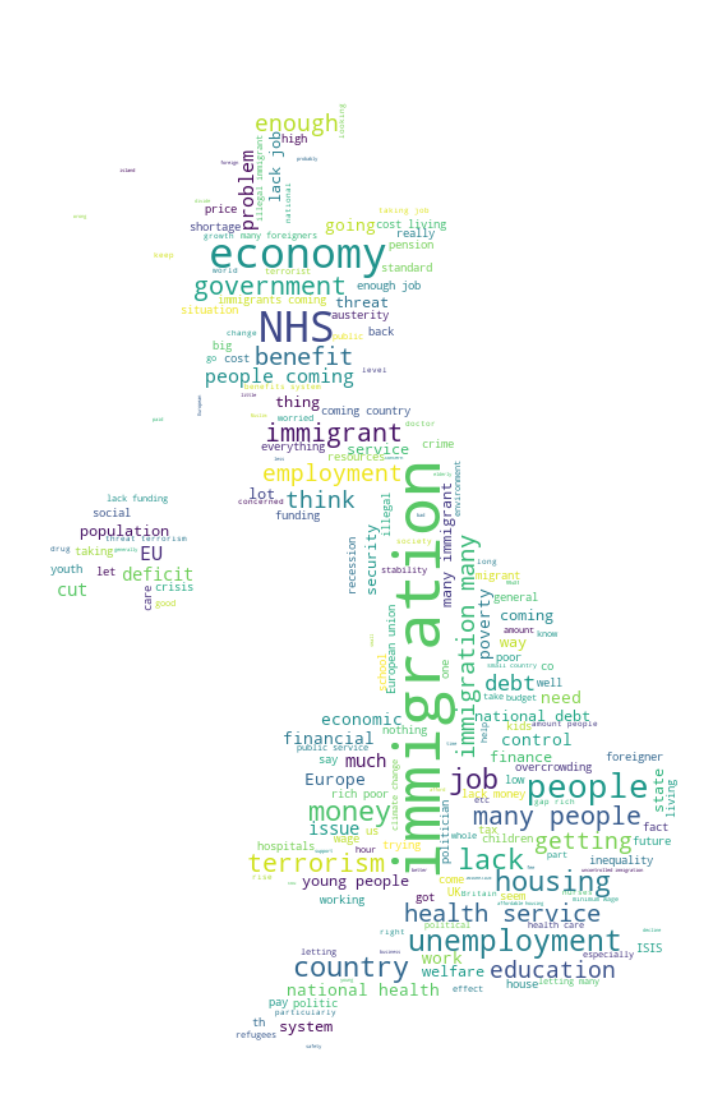

In [16]:
# Load the image (http://python-graph-gallery.com/wp-content/uploads/wave.jpg)
wave_mask = np.array(Image.open( "UK SHAPE copy.jpg")) 
# Make the figure
#wordcloud = WordCloud(mask=wave_mask).generate(text)
wordcloud = WordCloud(mask=wave_mask,max_font_size = 50, max_words=200, background_color="white").generate(A1)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()